<a href="https://colab.research.google.com/github/StephRoos/Data-Science/blob/main/Flights_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [67]:
import pandas as pd

df_flights = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Clean the data

## Null and missing data

In [68]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [69]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [70]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [71]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)

In [72]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Outliers

In [73]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



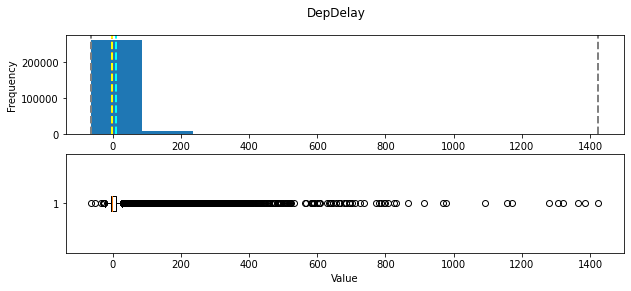

In [74]:
show_distribution(df_flights['DepDelay'])

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



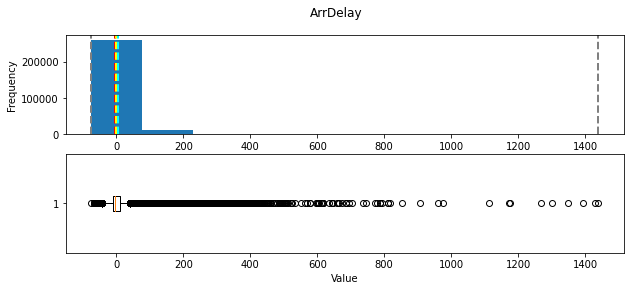

In [75]:
show_distribution(df_flights['ArrDelay'])

### Trim Outliers

In [76]:
# Trim 1% percentile
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim 90% percentile
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.9)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.9)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]

DepDelay 
Minimum:-11.00
Mean:1.36
Median:-1.00
Mode:-3.00
Maximum:37.00

ArrDelay 
Minimum:-32.00
Mean:-3.05
Median:-5.00
Mode:0.00
Maximum:37.00



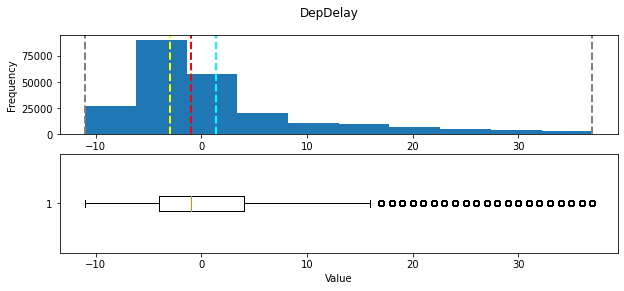

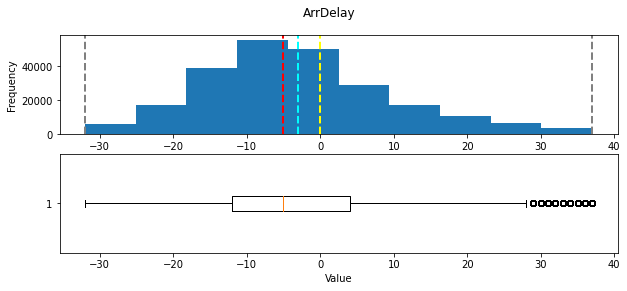

In [77]:
show_distribution(df_flights['DepDelay'])
show_distribution(df_flights['ArrDelay'])

# Explore the data

## Summary statistics

In [78]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,235268.0,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000,235268.000000
mean,2013.0,7.012552,15.810531,3.902622,12751.910230,12736.225483,1298.326819,1.359152,0.105220,1479.715533,-3.047559,0.117781,0.012135
std,0.0,1.999679,8.837770,1.993272,1508.511717,1506.099553,469.780776,9.280929,0.306838,488.607812,13.000475,0.322349,0.109489
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-4.000000,0.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-1.000000,0.000000,1500.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,0.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,37.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


## Mean delays

In [79]:
print('Mean Departure Delay : ',df_flights.DepDelay.mean())
print('Mean Arrival Delay : ',df_flights.ArrDelay.mean())

Mean Departure Delay :  1.3591521158848632
Mean Arrival Delay :  -3.0475585289967184


## Carrier delay performance

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


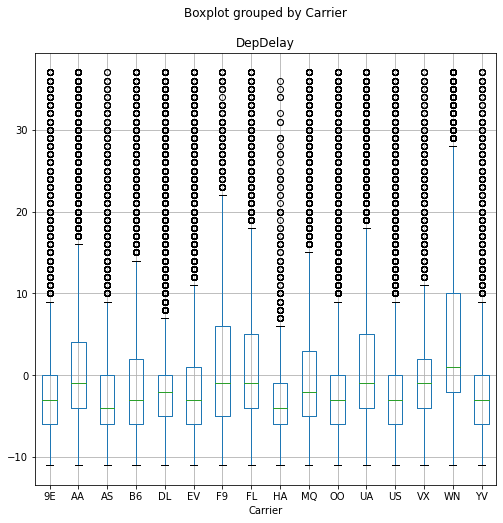

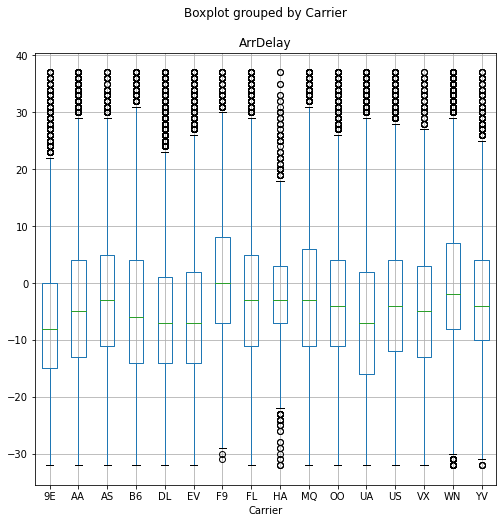

In [80]:
df_flights.boxplot(column='DepDelay', by='Carrier', figsize=(8,8))
df_flights.boxplot(column='ArrDelay', by='Carrier', figsize=(8,8))

## Arrival delays vs days of the week

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


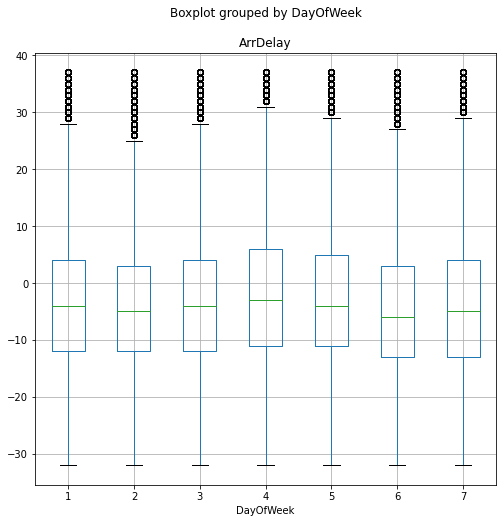

In [81]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(8,8))

## Airport with max departure delay 

,DepDelay
OriginAirportName,
Chicago Midway International,6.401283
Dallas Love Field,5.074492
William P Hobby,5.007803
Baltimore/Washington International Thurgood Marshall,3.893386
Denver International,3.774580
...,...
Tucson International,-1.332993
Richmond International,-1.492432
Kahului Airport,-1.815459


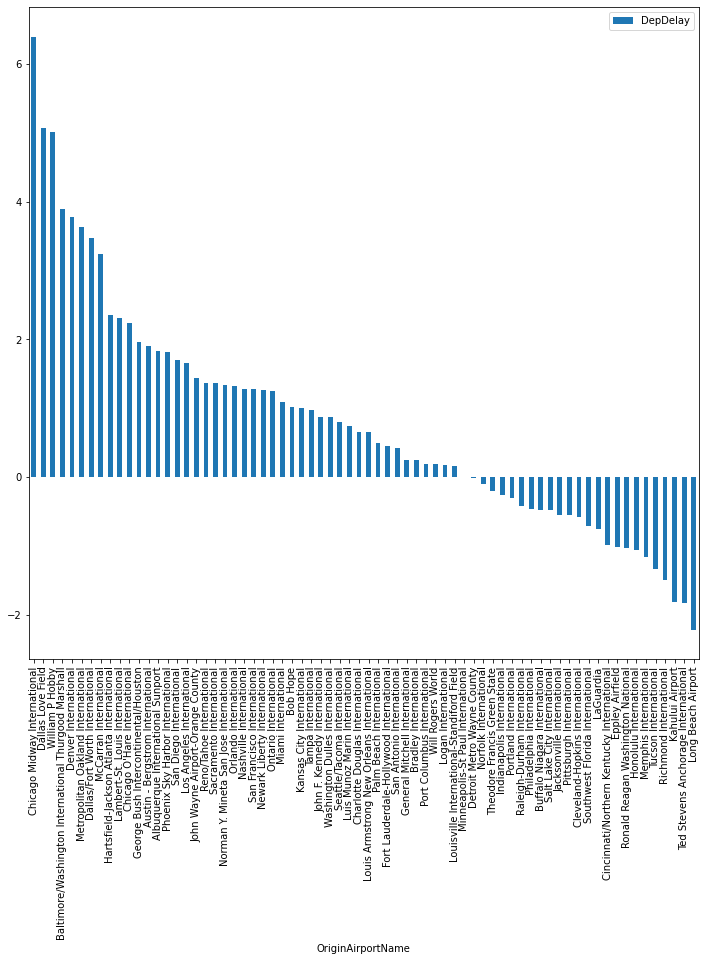

In [83]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

## Do late departures tend to result in longer arrival delays than on-time departures?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


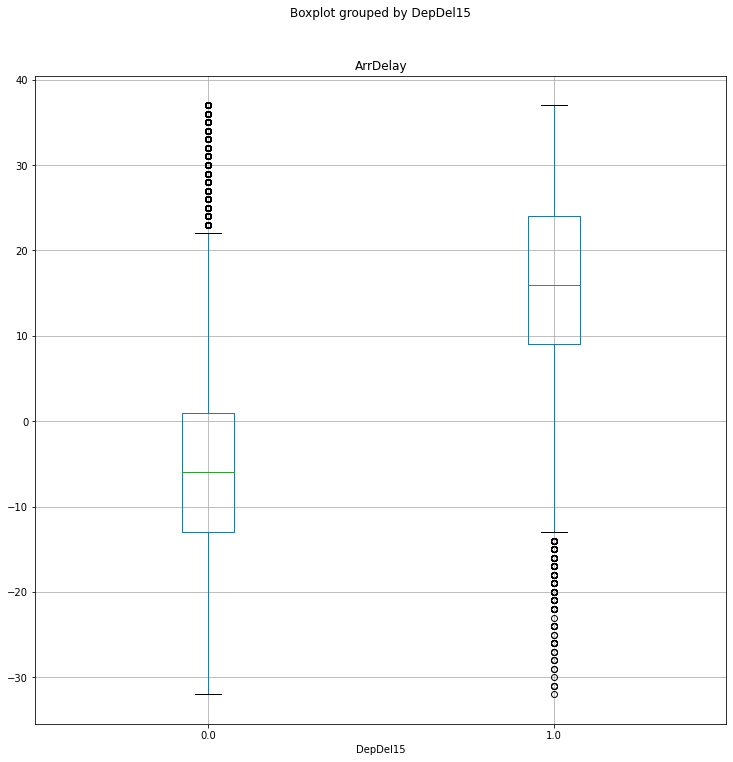

In [84]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

## Route with most late arrivals

In [85]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,147
Los Angeles International > San Francisco International,123
McCarran International > Los Angeles International,92
LaGuardia > Hartsfield-Jackson Atlanta International,88
Los Angeles International > McCarran International,82
...,...
McCarran International > Cincinnati/Northern Kentucky International,0
Tampa International > Cleveland-Hopkins International,0
Luis Munoz Marin International > Ronald Reagan Washington National,0


## Route with highest average arrival delay

In [86]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International > Palm Beach International,18.000000
Denver International > Raleigh-Durham International,14.851852
Charlotte Douglas International > General Mitchell International,13.500000
Cleveland-Hopkins International > Philadelphia International,12.800000
...,...
Jacksonville International > Chicago Midway International,-20.000000
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
